In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

# import datasets
from plotnine.data import diamonds

Text(0.5, 1.0, 'QQ Plot of diamonds price')

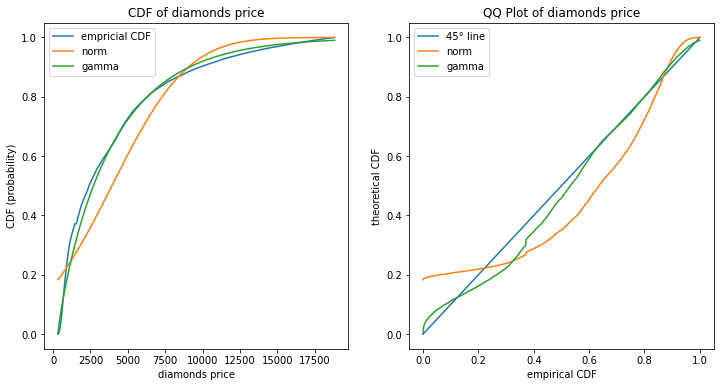

In [4]:
# https://stackoverflow.com/a/37616966 used as template
fig, axes = plt.subplots(1, 2, figsize=(6*2, 6))

y = np.sort(diamonds['price'])
ecdf = ECDF(y)
axes[0].plot(y, ecdf(y), label='empricial CDF')
axes[1].plot(ecdf(y), ecdf(y), label='45° line')

DISTRIBUTIONS = [stats.norm, stats.gamma]

for dist in DISTRIBUTIONS:
    params = dist.fit(y)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # Plot CDF
    axes[0].plot(y, dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)
    # QQ-Plot but with exchanged x- and y-axis such that x-axis stays stable
    axes[1].plot(ecdf(y), dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)

axes[0].legend()
axes[0].set_xlabel('diamonds price')
axes[0].set_ylabel('CDF (probability)')
axes[0].set_title('CDF of diamonds price')

axes[1].legend()
axes[1].set_xlabel('empirical CDF')
axes[1].set_ylabel('theoretical CDF')
axes[1].set_title('QQ Plot of diamonds price')